Data loaded succesfully!
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex

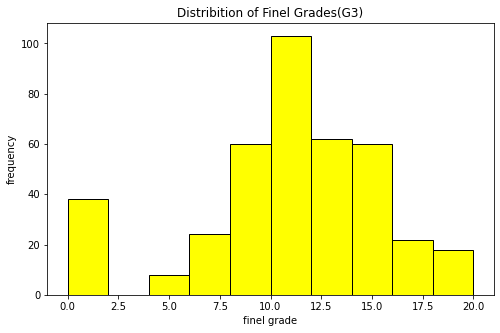

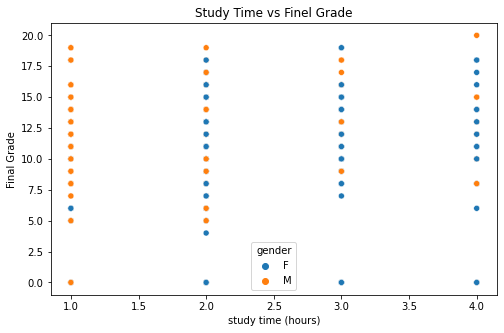

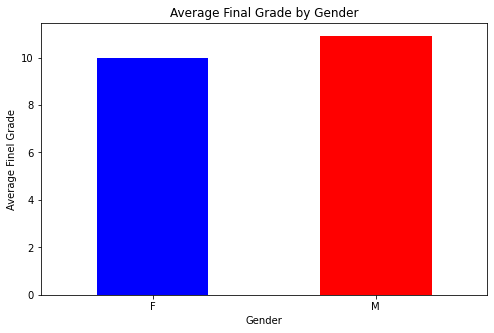

In [1]:
# Importing libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#load the data into a dataframe
data = pd.read_csv("student-mat.csv", sep=";")
print("Data loaded succesfully!")


#Step 2: data exploration
print(data.head()) # display the fist five rows
print("\nDataset Info:")
print(data.info()) # check data type and missing values

#Step 3: data cleaning
#Check the missing values
print("\nMissing values:")
print(data.isnull().sum())

#remove duplicates
data = data.drop_duplicates()

#Step 4: data analysis
#question 1 :what is the average score in math(G3)?
average_score = data['G3'].mean()
print(f"\nAverage Math Score (G3): {average_score:.2f}")

#question 2: how many student scored above 15 in their finel grade(G3)? 
student_above_15 = len(data[data['G3'] > 15])
print(f"number of student scoring above 15:{student_above_15}")

#question 3: is there a correlation b/w study time and finel grade?
correlation = data['studytime'].corr(data['G3'])
print(f"coorelation between study time and finel grade: {correlation:2f}")

#question4 :which gender has a higher average finel grade?
average_grade_by_gender = data.groupby('sex')['G3'].mean()
print("\nAverage Finel Grade by Gender:")
print(average_grade_by_gender)

#step 5:data visualization
#histogram of finel grades
plt.figure(figsize=(8,5))
plt.hist(data['G3'],bins=10,color='yellow',edgecolor='black')
plt.title("Distribition of Finel Grades(G3)")
plt.xlabel("finel grade")
plt.ylabel("frequency")
plt.show()

#scatter plot of study time vs finel grade
plt.figure(figsize=(8,5))
sns.scatterplot(data=data, x='studytime',y='G3', hue='sex')
plt.title("Study Time vs Finel Grade")
plt.xlabel("study time (hours)")
plt.ylabel("Final Grade")
plt.legend(title="gender")
plt.show()

#bar chart of average scores by gender
plt.figure(figsize=(8,5))
average_grade_by_gender.plot(kind='bar', color=['blue', 'red'])
plt.title("Average Final Grade by Gender")
plt.ylabel("Average Finel Grade")
plt.xlabel("Gender")
plt.xticks(rotation=0)
plt.show()